<a href="https://colab.research.google.com/github/obeabi/Bayesian_AB_Testing/blob/main/Greedy_Epsilon_BERNOULI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# Initalize constant
NUM_TRIALS = 10000
EPS = 0.1


# True win rates of bandits or prboabiilties of bandits
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]   

## Epsilon-Greedy Algorithm

In [14]:

class BanditArm:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 0
    self.N = 0
  
  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N +=  1 # NUMBER OF SAMPLE COLLECTED
    self.p_estimate = ((self.N - 1)* self.p_estimate    + x)/ self.N
    #self.p_estimate = self.p_estimate + (( x - self.p_estimate )/ self.N)

  def __str__(self) :
    return "This is my bandit class"
    




In [20]:
bandits = [BanditArm(p) for p in BANDIT_PROBABILITIES]
print(len(bandits))
b = bandits[0]
print()
print(b)

3

This is my bandit class


In [12]:
y = [b.p for b in bandits]
y

[0.2, 0.5, 0.75]

In [13]:
np.argmax(y)

2

optimal j: 2
mean estimate: 0.18362282878411917
mean estimate: 0.49710982658959535
mean estimate: 0.7541887363528241
total reward earned: 7223.0
overall win rate: 0.7223
num_times_explored: 993
num_times_exploited: 9007
num times selected optimal bandit: 9251


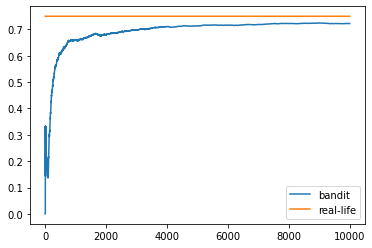

In [26]:
def experiment():
  bandits = [BanditArm(p) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0
  optimal_j = np.argmax([b.p for b in bandits]) # WILL NOT E KNOWN IN REAL LIFE
  print("optimal j:", optimal_j)

  for i in range(NUM_TRIALS):

    # use epsilon-greedy to select the next bandit
    if np.random.random() < EPS:
      num_times_explored += 1
      j = np.random.randint(len(bandits))

    else:
      num_times_exploited += 1
      j = np.argmax([b.p_estimate for b in bandits])

    # Will not be known in real life
    if j == optimal_j:
      num_optimal += 1

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update rewards log
    rewards[i] = x

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)
 
  # print mean estimates for each bandit
  for b in bandits:
    print("mean estimate:", b.p_estimate)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num_times_explored:", num_times_explored)
  print("num_times_exploited:", num_times_exploited)
  print("num times selected optimal bandit:", num_optimal)

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates,label = 'experiment')
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES), label = 'real-life')
  plt.legend()
  plt.show()


if __name__ == "__main__":
  experiment() 



# Adding cooling schedules

In [ ]:
# Initalize constant
NUM_TRIALS = 10000
e_0 = 0.1
k   = 0.1
alpha = 0.1
a = 0.1
b = 0.1
c = 0.04
e_min = 0.08

# True win rates of bandits or prboabiilties of bandits
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]   

## Epsilon-Greedy Algorithm with cooling schedules incorpoated

In [ ]:

class BanditArm:
  def __init__(self, p,e_0):
    # p: the win rate
    self.p = p
    self.p_estimate = 0
    self.N = 0
    self.EPS = e_0

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N +=  1 # NUMBER OF SAMPLE COLLECTED
    #self.p_estimate = ((self.N - 1)* self.p_estimate    + x)/ self.N
    self.p_estimate = self.p_estimate + (( x - self.p_estimate )/ self.N)


  def update_EPS(self, EPS):
      self.EPS = 0*(self.EPS *0.75**0.5)




In [ ]:
def experiment():
  bandits = [BanditArm(p,EPS) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0
  optimal_j = np.argmax([b.p for b in bandits]) # WILL NOT E KNOWN IN REAL LIFE
  print("optimal j:", optimal_j)

  for i in range(NUM_TRIALS):

    # use epsilon-greedy to select the next bandit
    if np.random.random() < EPS:
      num_times_explored += 1
      j = np.random.randint(len(bandits))

    else:
      num_times_exploited += 1
      j = np.argmax([b.p_estimate for b in bandits])

    # Will not be known in real life
    if j == optimal_j:
      num_optimal += 1

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update rewards log
    rewards[i] = x

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)

      # update the distribution for the bandit whose arm we just pulled
    bandits[j].update_EPS(EPS)
     

 

  # print mean estimates for each bandit
  for b in bandits:
    print("mean estimate:", b.p_estimate)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num_times_explored:", num_times_explored)
  print("num_times_exploited:", num_times_exploited)
  #print("num times selected optimal bandit:", num_optimal)

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates)
  #plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()


if __name__ == "__main__":
  experiment() 

